In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import collections

In [227]:
def f(y, t):
    a = y[0]
    w = y[1]
    k1 = k2 = 0.01
    
    dadt = -k1*a**2 + k2*w
    dwdt = k1*a**2 - k2*w
    
    return np.array([dadt, dwdt])

In [228]:
t = np.linspace(0, 1200, 100)
y0 = np.array([1.0, 0.0])
y = odeint(f, y0, t)

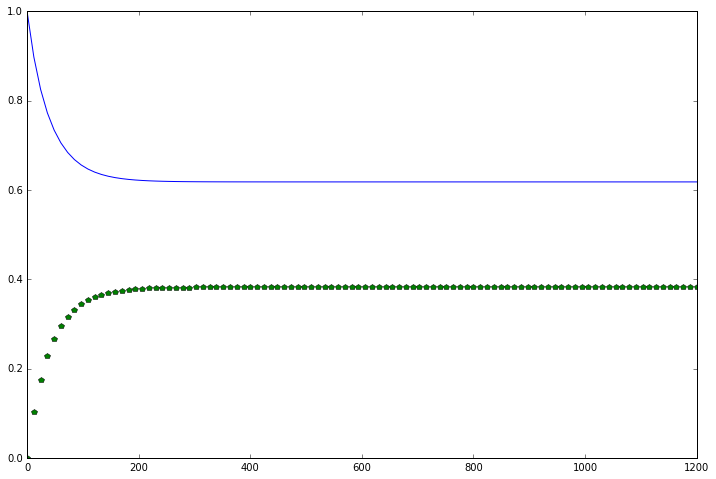

In [229]:
plt.plot(t, y[:, 0])
plt.plot(t, y[:, 1], 'p')

# Conversion

## No water

In [102]:
cr_files = {}
avg_cr = {}
std_cr = {}
for f in os.listdir('scan_p_1000/no_water/'):
    if f.startswith('cr'):
        k = float(f.split('_')[2])
        d = np.loadtxt(os.path.join('scan_p_1000/no_water/', f))
        if k not in cr_files:
            cr_files[k] = d
        if d.shape[0] > cr_files[k].shape[0]:
            cr_files[k] = d

(0, 600.0)

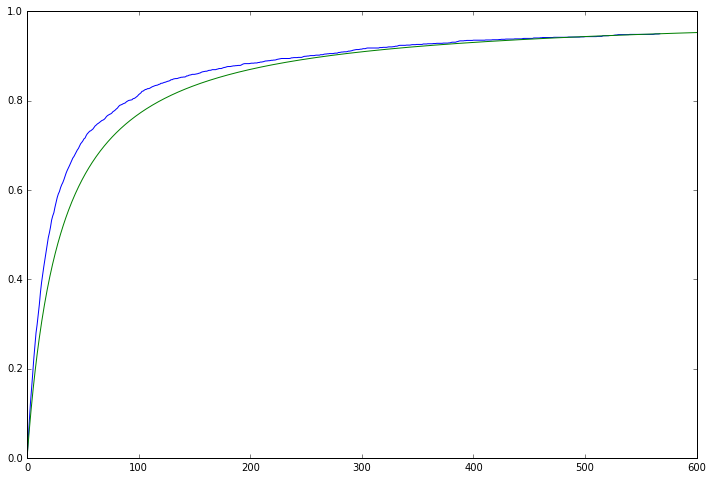

In [145]:
def f_1(y, t):
    a = y[0]
    k1 = 0.0335
    
    dadt = -k1*a**2
    
    return np.array([dadt])

def f_w(y, t):
    a = y[0]
    w = y[1]
    k1 = k2 = 0.001
    
    dadt = -k1*a**2 + k2*w
    dwdt = k1*a**2 - k2*w
    
    return np.array([dadt, dwdt])
t = np.linspace(0, 600, 1000)
y0 = np.array([1.0])
y = odeint(f_1, y0, t)

plt.plot((cr_files[0.05][:, 0]/1000.0)-500.0, cr_files[0.05][:, 1]/4000.0, '-')
plt.plot(t, 1.0-y)
plt.xlim(xmin=0)